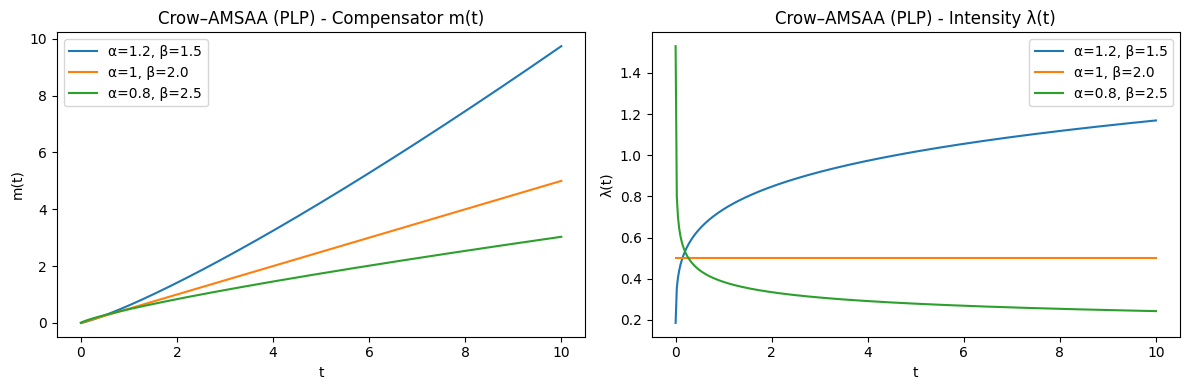

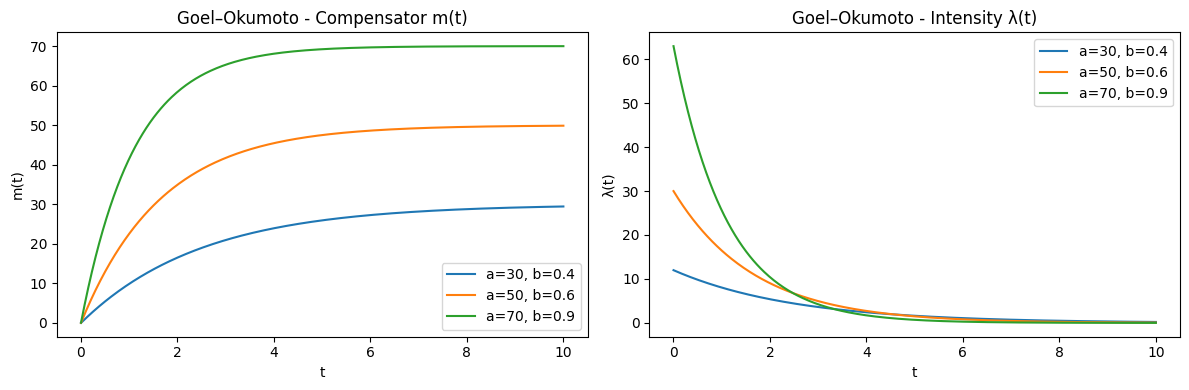

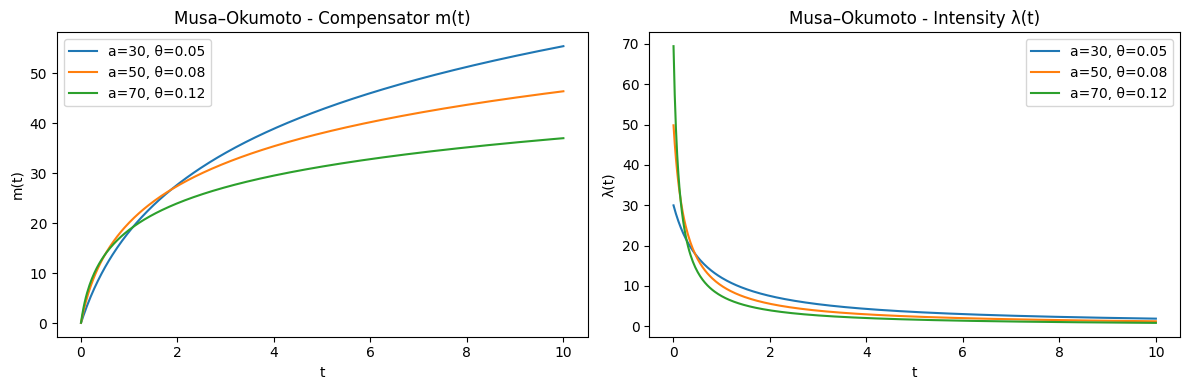

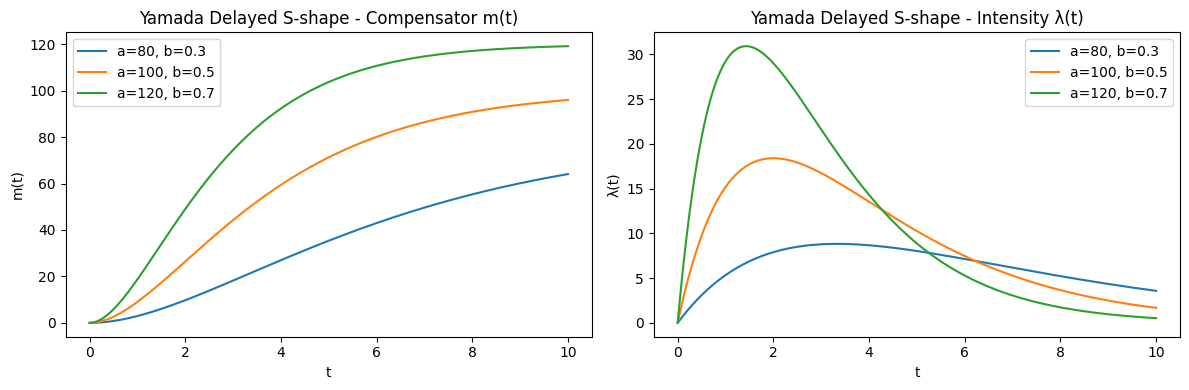

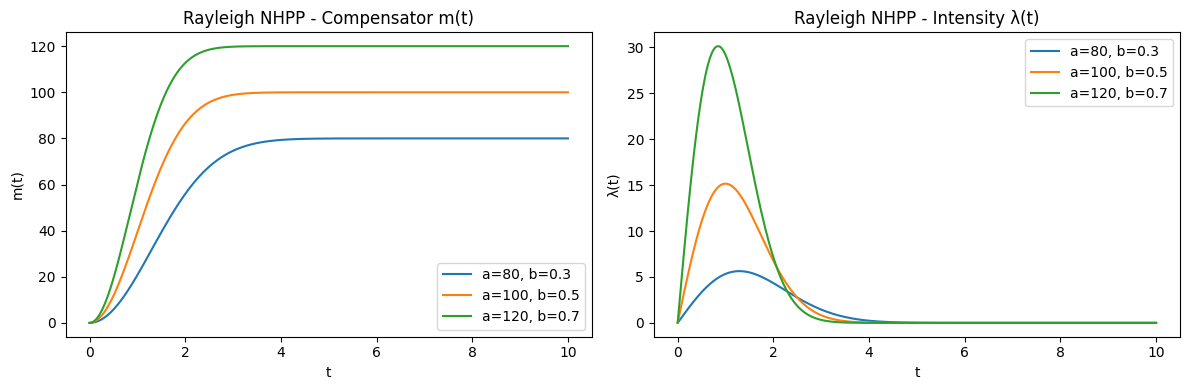

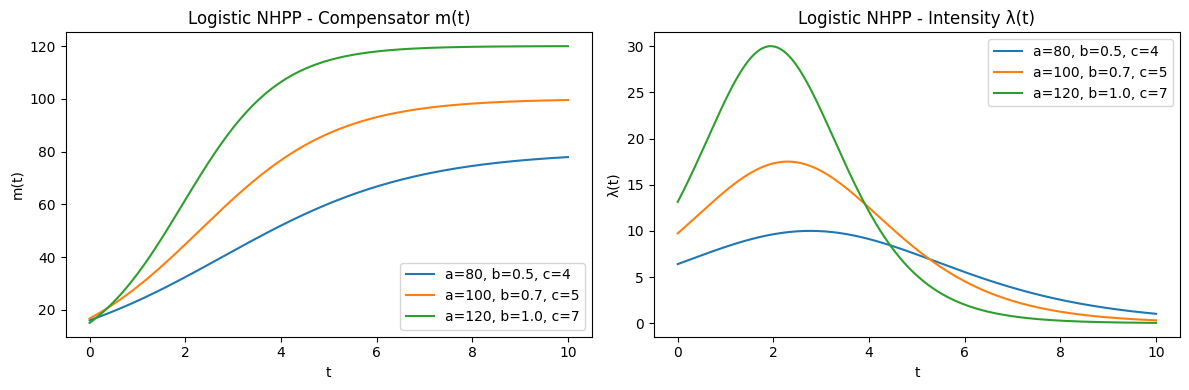

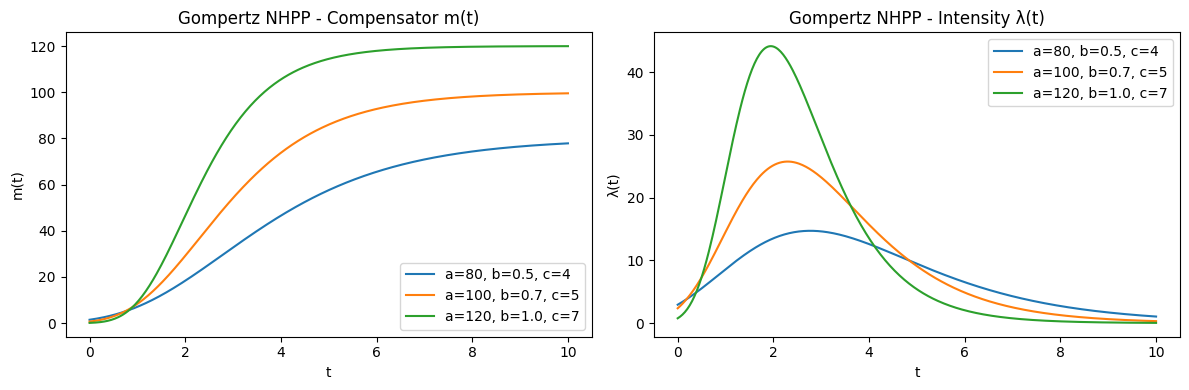

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time grid
t = np.linspace(0.001, 10, 400)

def plot_model(name, intensities, compensators):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot compensators (left)
    for label, m in compensators.items():
        axes[0].plot(t, m, label=label)
    axes[0].set_title(f"{name} - Compensator m(t)")
    axes[0].set_xlabel("t")
    axes[0].set_ylabel("m(t)")
    axes[0].legend()
    
    # Plot intensities (right)
    for label, l in intensities.items():
        axes[1].plot(t, l, label=label)
    axes[1].set_title(f"{name} - Intensity λ(t)")
    axes[1].set_xlabel("t")
    axes[1].set_ylabel("λ(t)")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


# -------------------------------
# 6. Crow–AMSAA (Power-Law)
# m(t)= (t/β)^α
# λ(t)= α t^{α-1}/β^α
# -------------------------------
params_c = [(1.2,1.5),(1,2.0),(0.8,2.5)]
intens_c = {}
comp_c = {}
for alpha,beta in params_c:
    intens = (alpha/(beta**alpha))*t**(alpha-1)
    comp = (t/beta)**alpha
    label = f"α={alpha}, β={beta}"
    intens_c[label] = intens
    comp_c[label] = comp

plot_model("Crow–AMSAA (PLP)", intens_c, comp_c)


# -------------------------------
# 1. Goel–Okumoto
# -------------------------------
params_go = [(30,0.4),(50,0.6),(70,0.9)]
intens_go = {}
comp_go = {}
for a,b in params_go:
    intens = a*b*np.exp(-b*t)
    comp = a*(1 - np.exp(-b*t))
    label = f"a={a}, b={b}"
    intens_go[label] = intens
    comp_go[label] = comp

plot_model("Goel–Okumoto", intens_go, comp_go)


# -------------------------------
# 7. Musa–Okumoto
# m(t)= (1/θ) ln(1+θ a t)
# λ(t)= a/(1+θ a t)
# -------------------------------
params_m = [(30,0.05),(50,0.08),(70,0.12)]
intens_m = {}
comp_m = {}
for a,theta in params_m:
    intens = a/(1+theta*a*t)
    comp = (1/theta)*np.log(1+theta*a*t)
    label = f"a={a}, θ={theta}"
    intens_m[label] = intens
    comp_m[label] = comp

plot_model("Musa–Okumoto", intens_m, comp_m)


# -------------------------------
# 2. Yamada Delayed S-shape
# m(t)=a(1-(1+bt)e^{-bt})
# λ(t)=a b^2 t e^{-bt}
# -------------------------------
params_y = [(80,0.3),(100,0.5),(120,0.7)]
intens_y = {}
comp_y = {}
for a,b in params_y:
    intens = a*(b**2)*t*np.exp(-b*t)
    comp = a*(1 - (1+b*t)*np.exp(-b*t))
    label = f"a={a}, b={b}"
    intens_y[label] = intens
    comp_y[label] = comp

plot_model("Yamada Delayed S-shape", intens_y, comp_y)


# -------------------------------
# 3. Rayleigh NHPP
# m(t)= a(1 - e^{-b t^2})
# λ(t)= a b^2 t e^{-b t^2}
# -------------------------------
params_r = [(80,0.3),(100,0.5),(120,0.7)]
intens_r = {}
comp_r = {}
for a,b in params_r:
    intens = a*(b**2)*t*np.exp(-b*t**2)
    comp = a*(1 - np.exp(-b*t**2))
    label = f"a={a}, b={b}"
    intens_r[label] = intens
    comp_r[label] = comp

plot_model("Rayleigh NHPP", intens_r, comp_r)


# -------------------------------
# 4. Logistic NHPP
# m(t)= a / (1 + c e^{-bt})
# λ(t)= a b c e^{-bt}/(1+c e^{-bt})^2
# -------------------------------
params_l = [(80,0.5,4),(100,0.7,5),(120,1.0,7)]
intens_l = {}
comp_l = {}
for a,b,c in params_l:
    intens = a*b*c*np.exp(-b*t) / (1+c*np.exp(-b*t))**2
    comp = a/(1 + c*np.exp(-b*t))
    label = f"a={a}, b={b}, c={c}"
    intens_l[label] = intens
    comp_l[label] = comp

plot_model("Logistic NHPP", intens_l, comp_l)


# -------------------------------
# 5. Gompertz NHPP
# m(t)= a exp(-c e^{-bt})
# λ(t)= a b c e^{-bt} exp(-c e^{-bt})
# -------------------------------
params_g = [(80,0.5,4),(100,0.7,5),(120,1.0,7)]
intens_g = {}
comp_g = {}
for a,b,c in params_g:
    intens = a*b*c*np.exp(-b*t)*np.exp(-c*np.exp(-b*t))
    comp = a*np.exp(-c*np.exp(-b*t))
    label = f"a={a}, b={b}, c={c}"
    intens_g[label] = intens
    comp_g[label] = comp

plot_model("Gompertz NHPP", intens_g, comp_g)


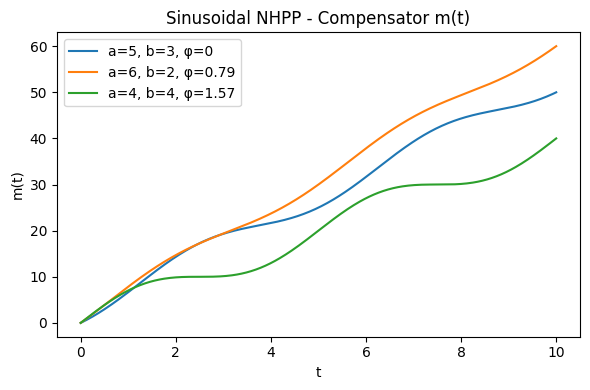

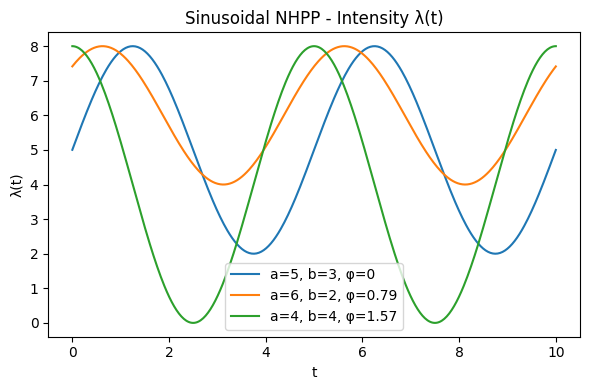

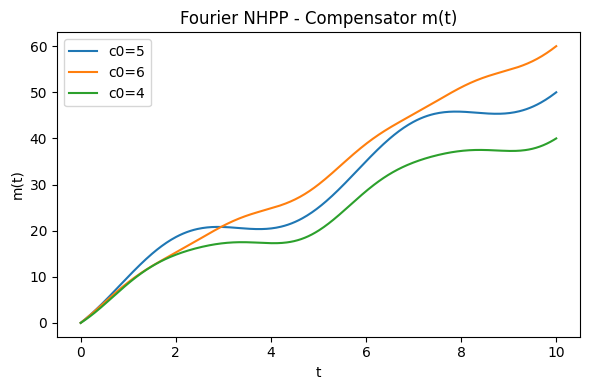

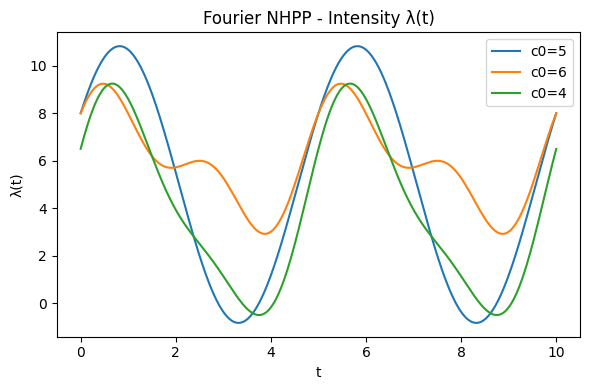

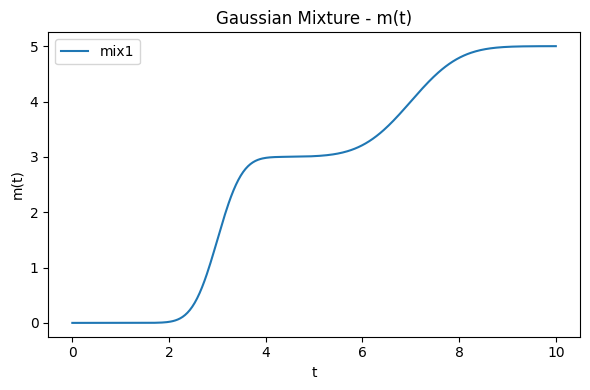

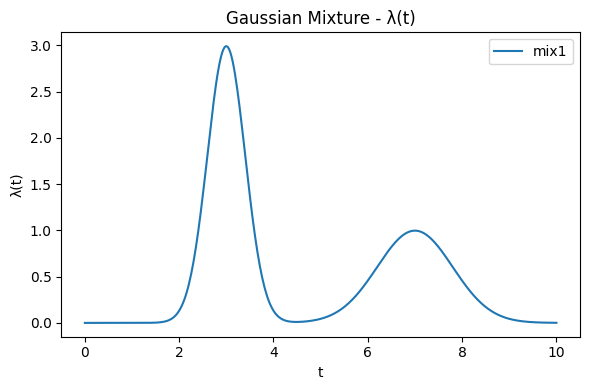

In [3]:
import numpy as np
import math

# Time grid
t = np.linspace(0.001, 10, 400)

def plot_single(name, curves, ylabel):
    plt.figure(figsize=(6,4))
    for label, y in curves.items():
        plt.plot(t, y, label=label)
    plt.title(name)
    plt.xlabel("t")
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------------
# 1. Sinusoidal NHPP
# ------------------------------------
params_sin = [
    (5, 3, 2*np.pi/5, 0),
    (6, 2, 2*np.pi/5, np.pi/4),
    (4, 4, 2*np.pi/5, np.pi/2)
]

intens_sin = {}
comp_sin = {}

for a, b, w, phi in params_sin:
    intens = a + b * np.sin(w*t + phi)
    comp = a*t + (b/w)*(np.cos(phi) - np.cos(w*t + phi))
    label = f"a={a}, b={b}, φ={round(phi,2)}"
    intens_sin[label] = intens
    comp_sin[label] = comp

plot_single("Sinusoidal NHPP - Compensator m(t)", comp_sin, "m(t)")
plot_single("Sinusoidal NHPP - Intensity λ(t)", intens_sin, "λ(t)")


# ------------------------------------
# 2. Fourier NHPP
# ------------------------------------
params_fourier = [
    (5, [(3,1),(2,1)], [(2,1),(1,1)]),
    (6, [(2,1),(1,2)], [(1,1),(1,2)]),
    (4, [(4,1),(1,2)], [(2,1),(0.5,2)])
]

intens_four = {}
comp_four = {}

for c0, cks, dks in params_fourier:
    intens = np.ones_like(t) * c0
    comp = c0 * t
    
    for ck, k in cks:
        w = 2*np.pi/5
        intens += ck * np.sin(k*w*t)
        comp += -(ck/(k*w)) * np.cos(k*w*t) + (ck/(k*w))
    
    for dk, k in dks:
        w = 2*np.pi/5
        intens += dk * np.cos(k*w*t)
        comp += (dk/(k*w)) * np.sin(k*w*t)

    label = f"c0={c0}"
    intens_four[label] = intens
    comp_four[label] = comp

plot_single("Fourier NHPP - Compensator m(t)", comp_four, "m(t)")
plot_single("Fourier NHPP - Intensity λ(t)", intens_four, "λ(t)")


# ------------------------------------
# 3. Gaussian Mixture NHPP
# ------------------------------------

def normal_pdf(z):
    return np.exp(-0.5*z*z)/math.sqrt(2*math.pi)

def normal_cdf(z):
    return 0.5*(1 + np.vectorize(math.erf)(z/np.sqrt(2)))

params_mix = [
    [(3,3,0.4),(2,7,0.8)]
]

intens_mix = {}
comp_mix = {}

for comp_params in params_mix:
    intens = np.zeros_like(t)
    comp = np.zeros_like(t)
    for w,mu,sigma in comp_params:
        z = (t-mu)/sigma
        intens += w*normal_pdf(z)/sigma
        comp += w*normal_cdf(z)
    intens_mix["mix1"] = intens
    comp_mix["mix1"] = comp

plot_single("Gaussian Mixture - m(t)", comp_mix, "m(t)")
plot_single("Gaussian Mixture - λ(t)", intens_mix, "λ(t)")